**Mihir Bhave
Stat 430 - Unsupervised Learning -Final Project**


**Data Set**

For this unsupervised learning report, I am using a credit card data set for clustering found on Kaggle. I will dive more into the contents of the data set during the Exploratory Data Analysis Phase. The original source of the data set can be found here : https://www.kaggle.com/arjunbhasin2013/ccdata

**Motivation**

I have chosen this data set because credit card clustering is very common in the real world and is used frequently in the banking industry. Banks spend a lot of time analyzing customers and their profiles to minimize risk. To do this, they have to use different models, and "banks have always been relying on statistical models" (Alto). Furthermore, they can use this clustering to group customers by utilizing the best combination of risks and rewards to maximize revenue.  For them, "it is a big opportunity for a bank to make money but it has to work closely with its risk as well as the strategy team which finally works with the marketing team" (Jhawar). This entire process begins with clustering customers and has the potential to make banks a lot of money. For example, in a credit card clustering algorithm done by author Prashant Ashok on the great learning blog, he conducts an unsupervised learning that can help banks improve. He mentions how banks in cluster 0 and cluster 1 should focus on their infrastrcture and facilities while banks in cluster 2 and cluster 3 should introduce various deposit schemes and increase their number of customers (Ashok). 

References

Alto, Valentina. “Credit Risk: Unsupervised Clients Clustering.” Medium, Towards Data Science, 1 Aug. 2019, towardsdatascience.com/credit-risk-unsupervised-clients-clustering-9eacae6807a0. 

Ashok, Prashanth. “Machine Learning: Learning Data Science with K-Means Clustering.” GreatLearning, 6 Apr. 2020, www.mygreatlearning.com/blog/learning-data-science-with-k-means-clustering/.

Jhawar, Akshay. “k-Means Clustering for Credit Card Marketing.” Medium, Medium, 11 June 2020, medium.com/@akshayjhawar.nitj/k-means-clustering-for-credit-card-marketing-5432486121a2. 

We will start by importing all the relevant libraries and functions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from pyclustertend import hopkins
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score
from skfuzzy.cluster import cmeans
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


Reading the credit card data set into a dataframe df. 

In [2]:
df = pd.read_csv("CreditCardData.csv")

**Data Cleaning**

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can see that the column CREDIT_LIMIT has one missing value while the MINIMUM_PAYMENTS column has 313 missing values. 

In [4]:
df = df[df['CREDIT_LIMIT'].notna()]
df['MINIMUM_PAYMENTS'].fillna(value=df['MINIMUM_PAYMENTS'].mean(), inplace = True)

We drop the entire row with an NA or missing value for the CREDIT_LIMIT column. For the MINIMUM_PAYMENT columns, we replace any NA or missing values with the average or mean of all values in that column. 

In [5]:
X = df.drop(['CUST_ID'], axis = 1)

Finally, we drop the CUST_ID column because we do not need the customer IDs to conduct clustering.

In [6]:
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

We can now see that the data contains no null or missing values.

**Exploratory Data Analysis**

In [7]:
df.shape

(8949, 18)

The data set has 8949 observations and 18 columns. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8949 non-null object
BALANCE                             8949 non-null float64
BALANCE_FREQUENCY                   8949 non-null float64
PURCHASES                           8949 non-null float64
ONEOFF_PURCHASES                    8949 non-null float64
INSTALLMENTS_PURCHASES              8949 non-null float64
CASH_ADVANCE                        8949 non-null float64
PURCHASES_FREQUENCY                 8949 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8949 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8949 non-null float64
CASH_ADVANCE_FREQUENCY              8949 non-null float64
CASH_ADVANCE_TRX                    8949 non-null int64
PURCHASES_TRX                       8949 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8949 non-null float64
MINIMUM_PAYMENTS            

We can see all the columns of the data set as well as the data types for each column.

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.304943,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


We can view the basic summary statistics for each numerical attribute.

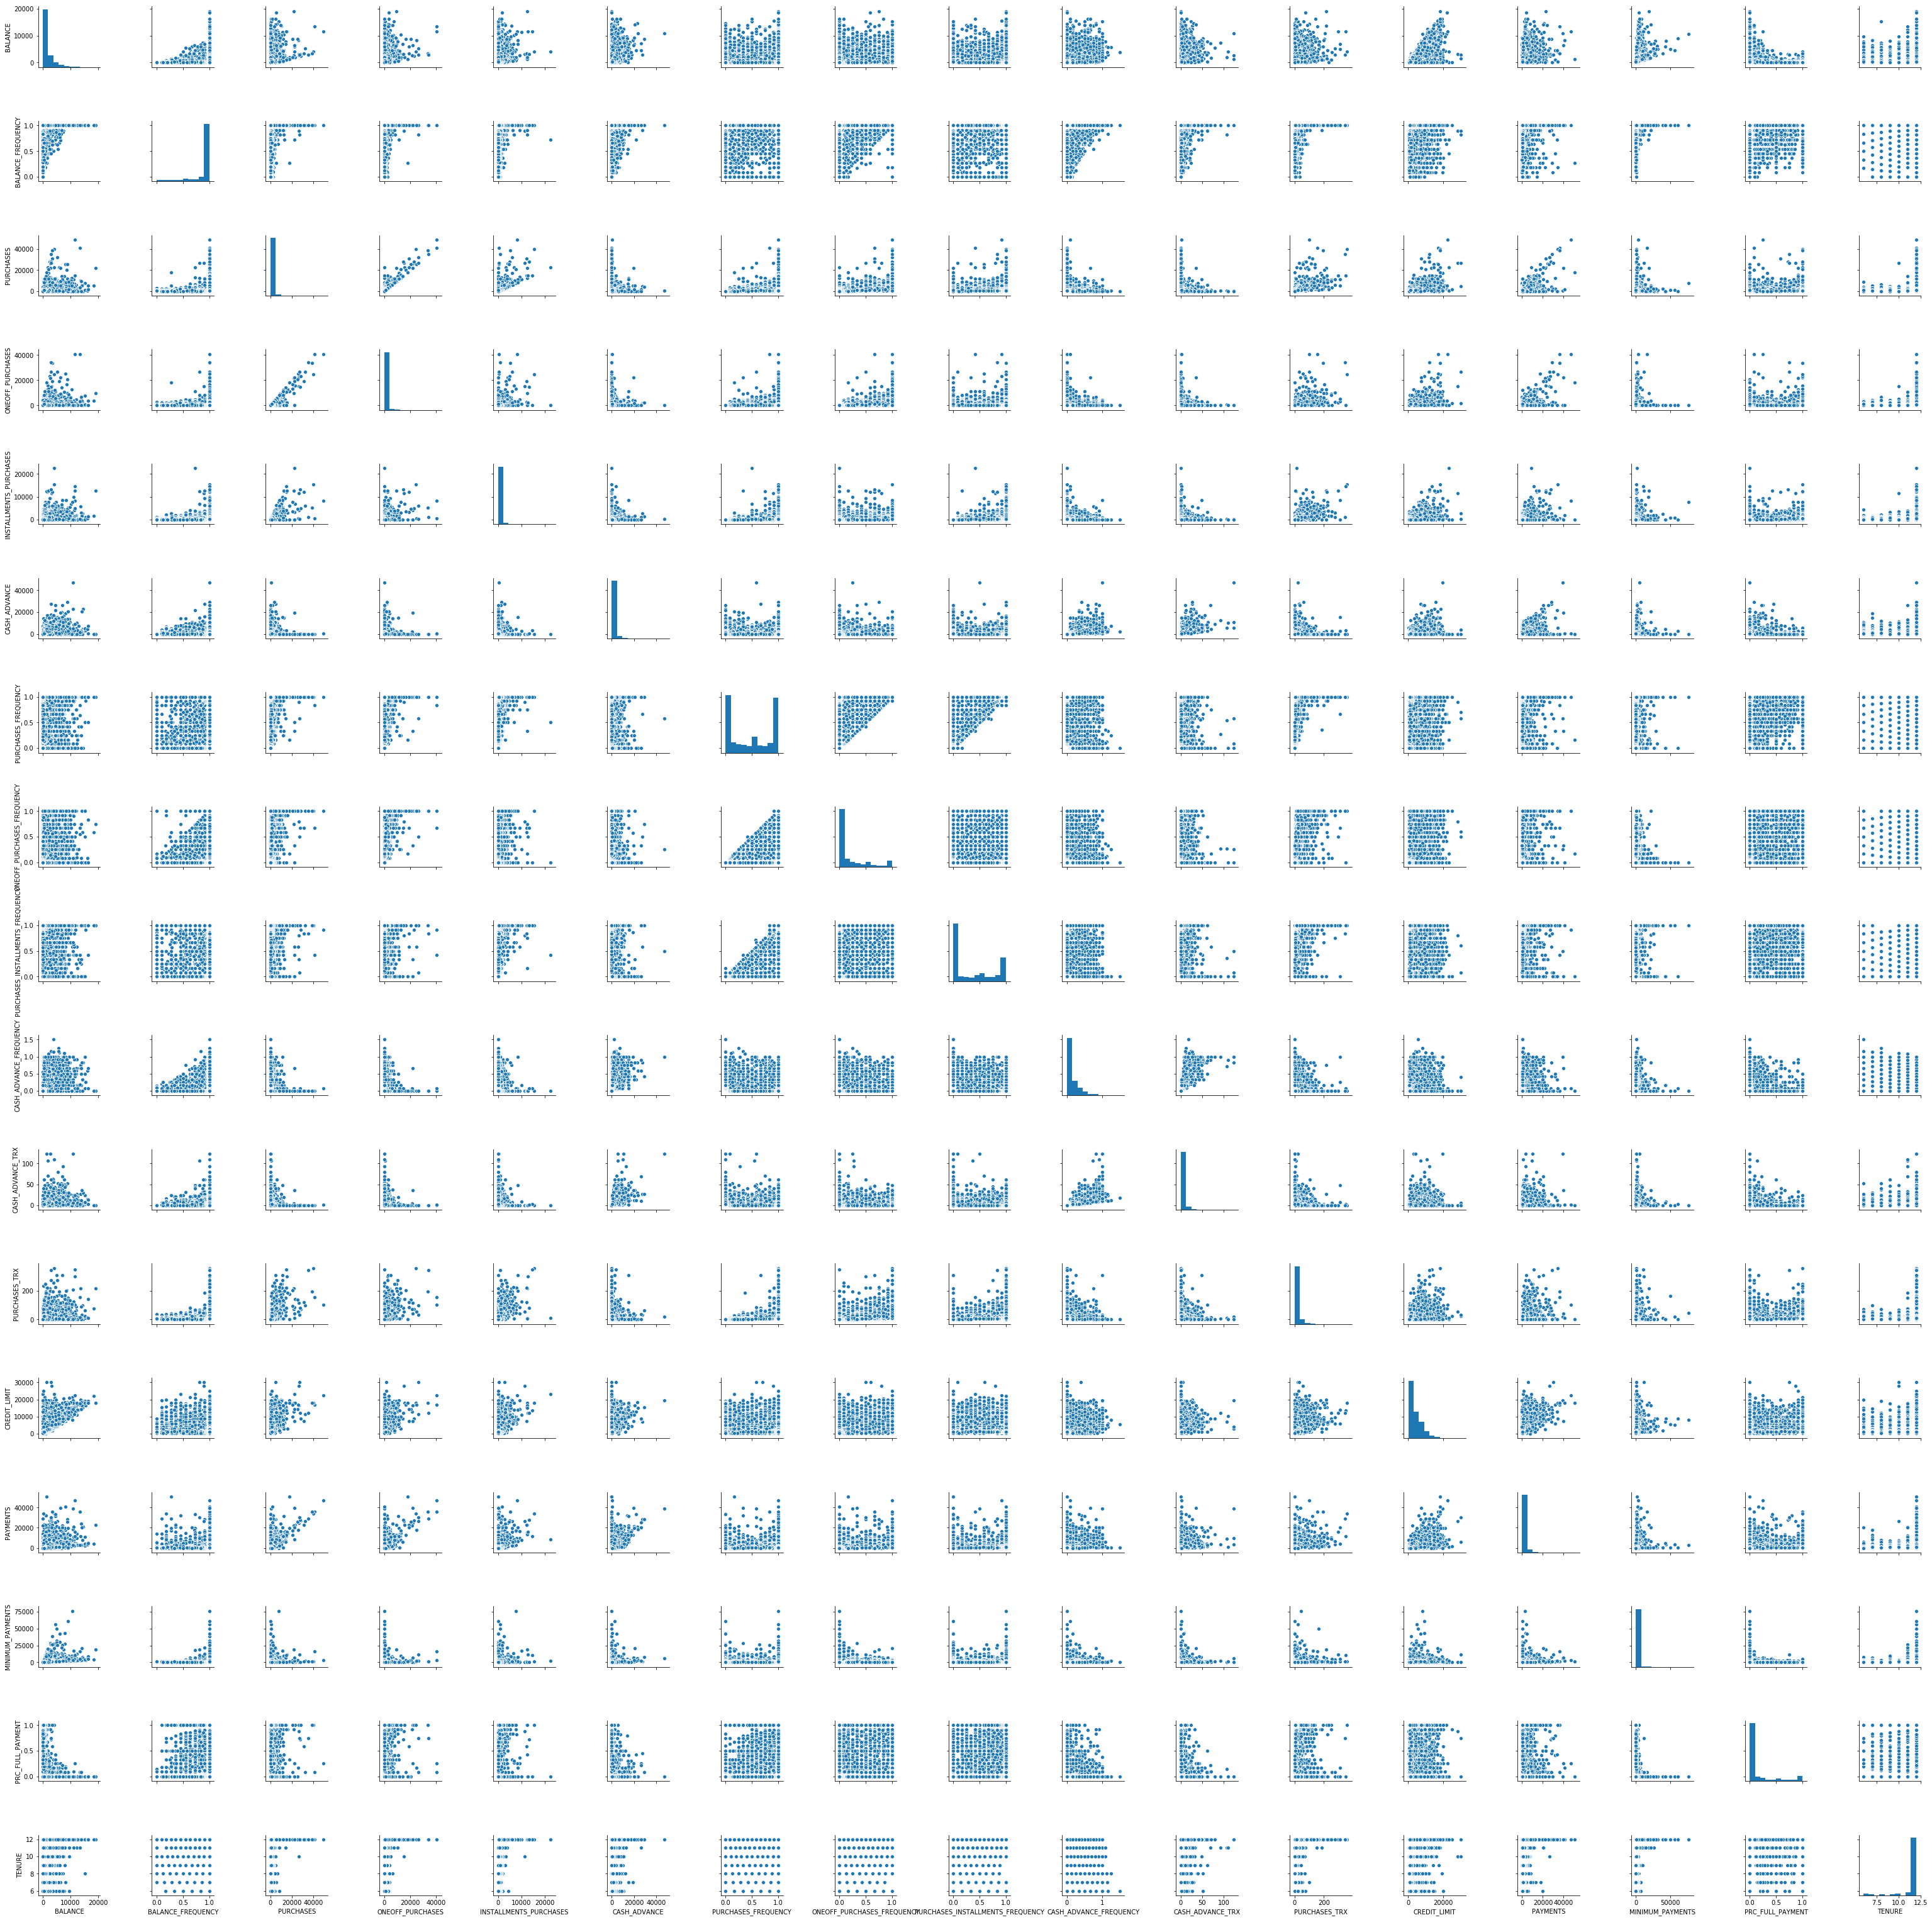

In [10]:
sns.pairplot(df)

It does not appear that there is any particularly strong pairwise relationship between attributes.

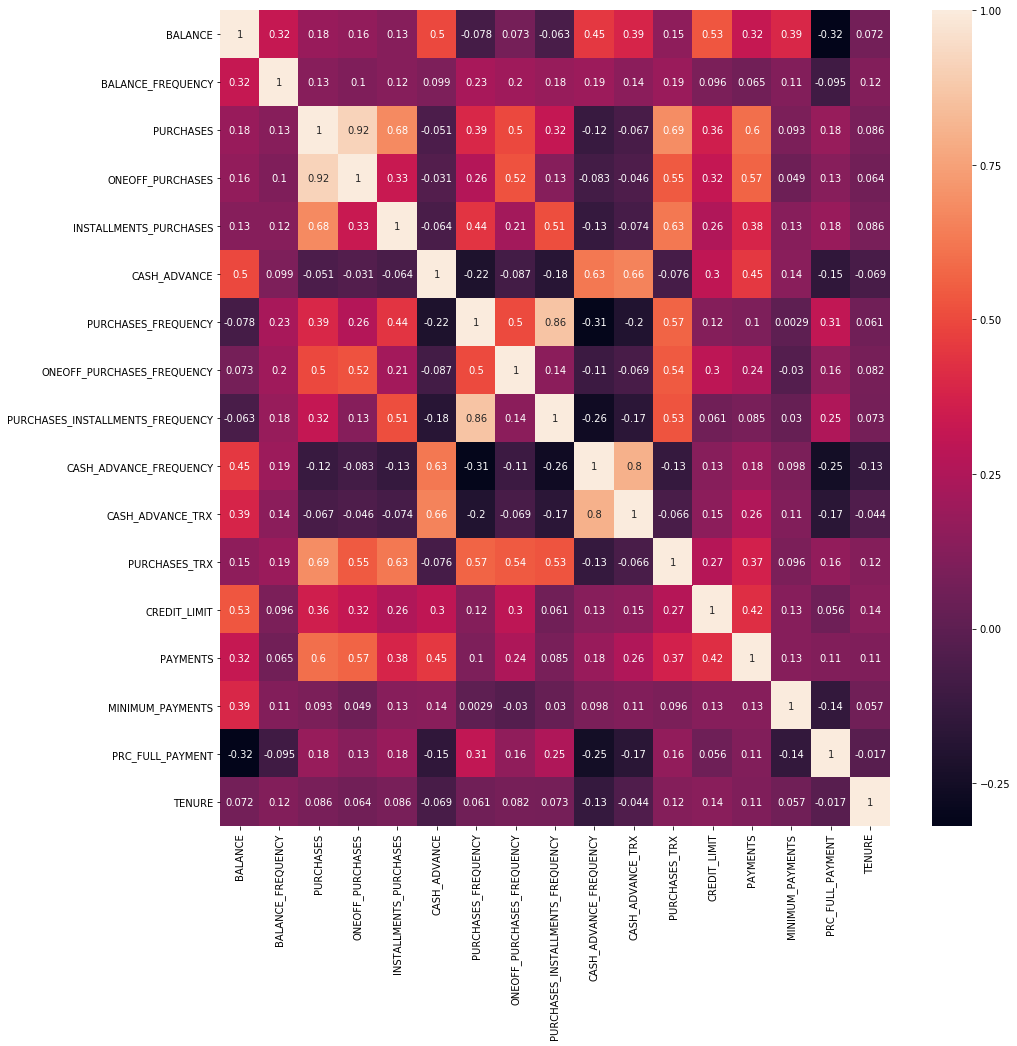

In [11]:
CorrelationMatrix = df.corr()
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(CorrelationMatrix, annot=True, ax=ax)
plt.show()

The heat map shows the correlations between each of the columns. Most of the columns have low correlations with each other. Some columns that stand out are PURCHASES and ONEOFF_PURCHASES, which have a high correlation of 0.92. PURCHASES_FREQUENCY and PURCHASES_INSTALLMENT_FREQUENCY also have a relatively high correlation of 0.86. These variables are largely expected to have high correlations with each other since they are in similar categories and influence each other. 

In [12]:
X = StandardScaler().fit_transform(X)

Finally, we will scale our data by mean subtracting and standard deviation dividing each attribute of our data set. Now, we can move on selecting out algorithm.

**Pre-Analysis Questions**

In [13]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    y = len(X)
    s = int(0.1 * y)
    hopkins_stats.append(hopkins(X,s))
print(hopkins_stats)

[0.03608727293345117, 0.034726195086686854, 0.03710415282242423, 0.03533316019190203, 0.035951172982283626]


All five of the Hopkin's Statistics are far away from 0.5, which suggests some kind of underlying clustering relationship. 

**Algorithm Selection (Kmeans)**

We will first run the kmeans algorithm with five trials and a cluster range from 1 to 12. The Kmeans algorithm is useful because it allows us to cluster unlabeled data with no class labels. We can divide customers into individual clusters and find patterns in the clusterings.

In [14]:
cluster_num_list=range(1,12)
avg_inertia_list=[]
for k in cluster_num_list:
    sub_inertia_list=[]
    for i in range(0,5):
        kmeans=KMeans(n_clusters=k).fit(X)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

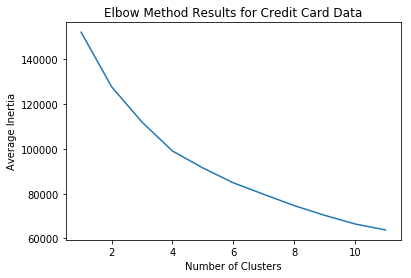

In [15]:
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Inertia')
plt.title('Elbow Method Results for Credit Card Data')
plt.show()

The elbow plot suggests that we should use four clusters since there is a big drop of at k=4, so this is the best value to use.

In [16]:
kmeans=KMeans(n_clusters=4).fit(X)
df['cluster']=kmeans.labels_

We run the Kmeans algorithm with 4 clusters and create a column in the data frame for the cluster labels.

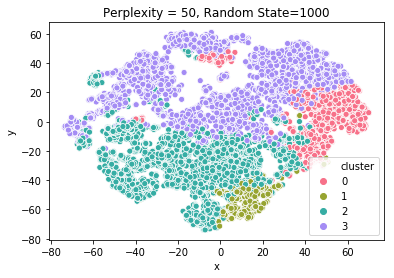

In [17]:
tsne = TSNE(n_components=2, perplexity=50, random_state=1000)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x', y='y', hue='cluster', legend = 'full', palette=sns.color_palette("husl", 4), data=dff)
plt.title('Perplexity = 50, Random State=1000')
plt.show()

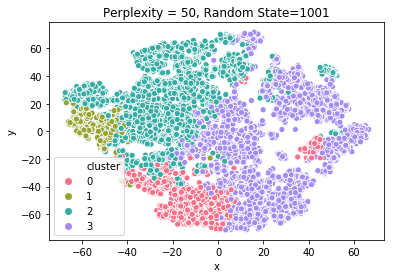

In [18]:
tsne = TSNE(n_components=2, perplexity=50, random_state=1001)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x', y='y', hue='cluster', legend = 'full', palette=sns.color_palette("husl", 4), data=dff)
plt.title('Perplexity = 50, Random State=1001')
plt.show()

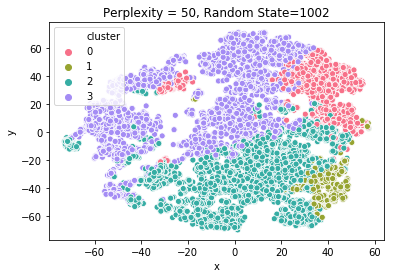

In [19]:
tsne = TSNE(n_components=2, perplexity=50, random_state=1002)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x', y='y', hue='cluster', legend = 'full', palette=sns.color_palette("husl", 4), data=dff)
plt.title('Perplexity = 50, Random State=1002')
plt.show()

We create three TSNE plots to display the four clusters. We used three different random states (1000,1001,1002) in each plot to ensure the results do not change, and the clustering seems to be consistent. Since this clustering is a hard assignment, we can color code the TSNE plot with the cluster labels.

In [20]:
dff['cluster'].value_counts()

3    3975
2    3367
0    1198
1     409
Name: cluster, dtype: int64

We can view the number of customers in each cluster.

**Post Analysis (Kmeans)**

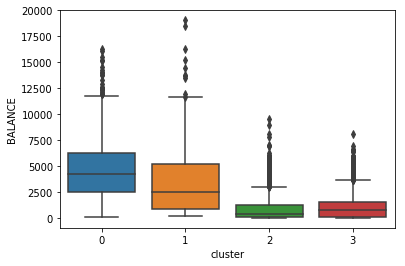

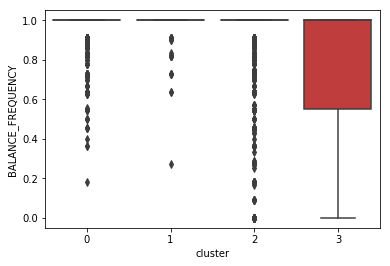

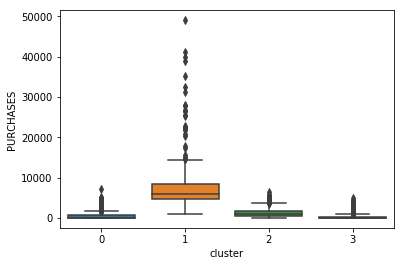

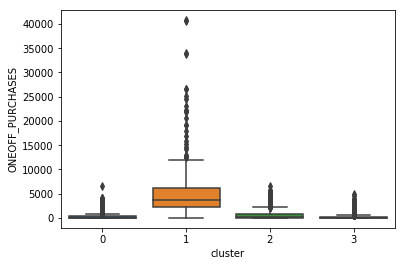

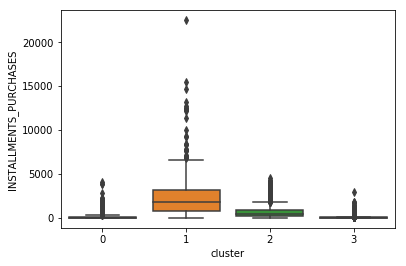

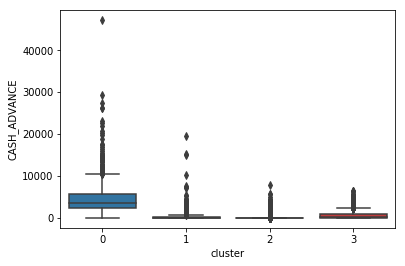

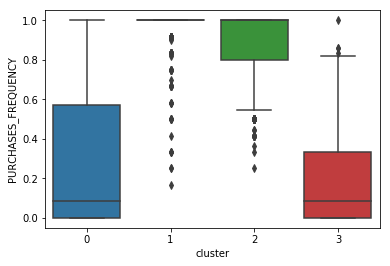

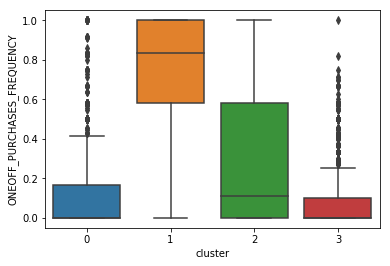

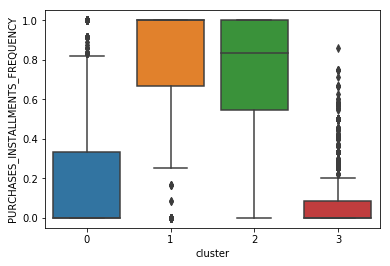

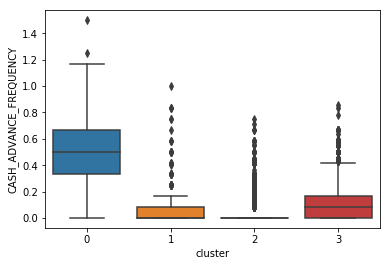

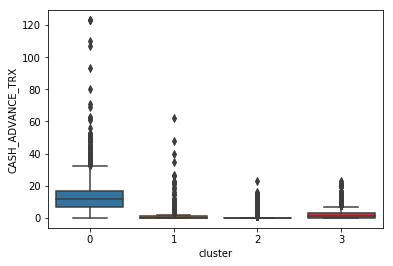

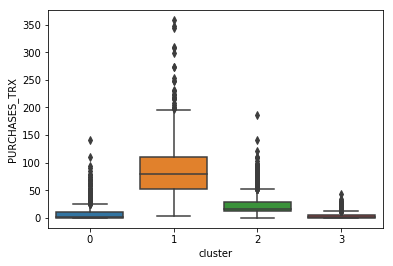

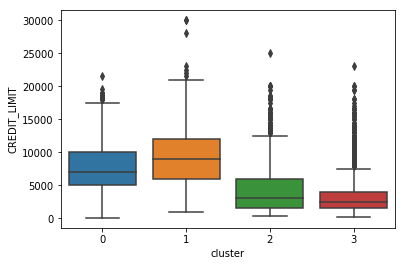

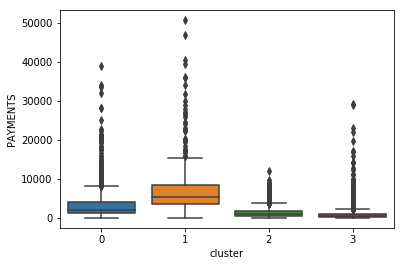

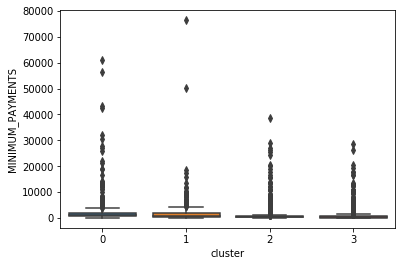

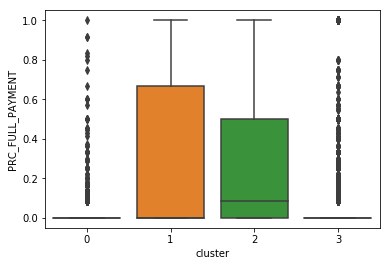

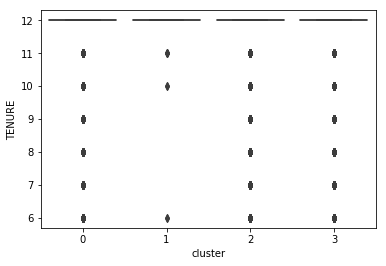

In [21]:
for col in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY',                   
'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',                              
'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']:
    sns.boxplot(x='cluster', y=col, data=df)
    plt.show()

Create boxplots to view distribtion of values for an attribute in each cluster. From the boxplots, we can characterize each cluster and what kind of customer attributs fall into it. There are four clusters (0,1,2,3). Cluster 0 is the smallest cluster and is characterized by customers with a moderately high balance and a high number of purchases made from their account. It also has customers who have high maximum purchases and high number of purchases in an installment with high frequencies of both. They rarely pay cash in advance, but make a lot of purchases and have a high credit limit. Cluster 1 the second largest cluster and is characterized by customers who have a low balance but make frequent purchases. They have a pretty low credit limit and do not make very high payments. Cluster 2 is the largest cluster and is characterized by customers with a low balance that is updated very often. The customers in this cluster rarely make purchases in one go or in few installments.They have a very low credit limit and do not make many payments. Finally, cluster 3 is the second smallest cluster and is characterized by customers with a high balance and few purchases. These customers make many cash payments in advance and have a pretty high credit limit. 

In [22]:
df_sort=df.sort_values(by=['cluster'])
df_sort=df_sort.drop(['CUST_ID','cluster'], axis=1)

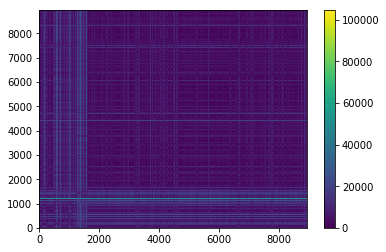

In [23]:
dist_mat = squareform(pdist(df_sort))
N = len(df_sort)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

If we along the diagonal for the four clusters, we can see that cluster 0 and cluster 3 have more light blue lines and patches, suggesting that they are less cohesive and may belong better to different clusters. Cluster 1 and cluster 2 have much darker patches, suggesting better cohesion. They are also surrounded by lighter colors, which is positive for their cohesion and separation.

In [24]:
silhouette_avg = silhouette_score(X, df['cluster'])
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.1975866678555425


The average silhouette score of 0.1976 is pretty low and far away from the ideal score of 1.

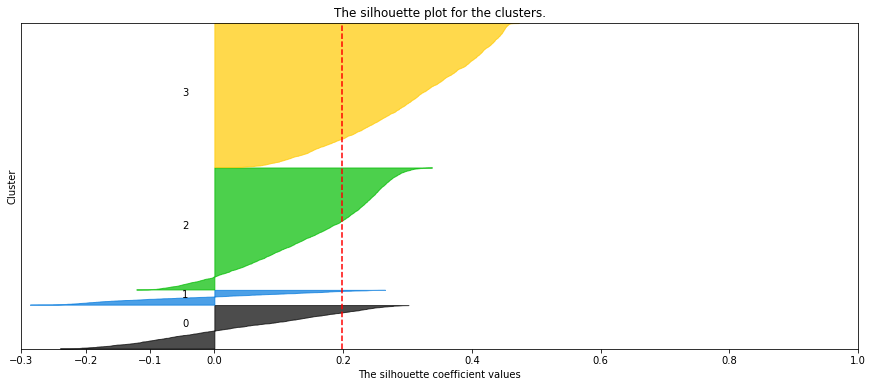

In [25]:
sample_silhouette_values = silhouette_samples(X, df['cluster'])

clusters=len(df['cluster'].unique())


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(15, 6)


ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(X) + (clusters + 1) * 10])


y_lower = 10
for i in range(clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[df['cluster'] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  

ax1.set_title("The silhouette plot for the clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([]) 
ax1.set_xticks([-0.3,-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

Cluster 0 has a poor silhouette score and has many negative values, indicating that there is very poor cohesion and separation. This is reflected in the TSNE plot since some points overlap with other clusters while other points are isolated and far away from the cluster. Cluster 3 follows a lagely similar pattern to 0. Cluster 1 is a little better, since it has a higher silhouette score and fewer negative values, indicating better cohesion and separation. The plot reflects this since the points have less overlap with other clusters, but it still exists and there are still many points that are far away from the main cluster. On the other hand, cluster 2 has a higher silhouette score and a rounded shape, indicating that it has good cohesion and separation. This cluster has the highest cohesion and separation of all four clusters, and this is reflected in the plot since the points have little overlap with other clusters and are all relatively close to each other.

**Algorithm Selection (DBSCAN)**

We can run the DBScan algorithm to check for any noise in our data and this will allow us to cluster data and separate it based on density.

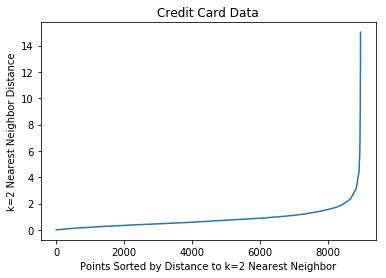

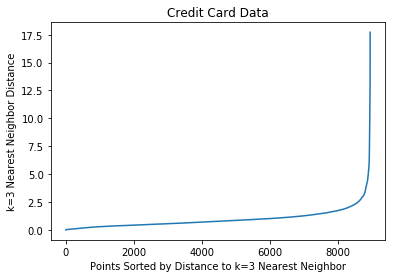

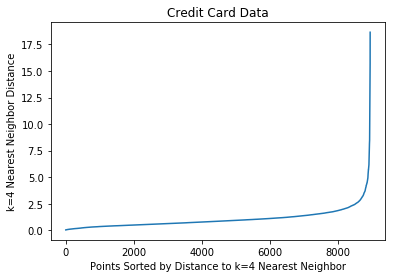

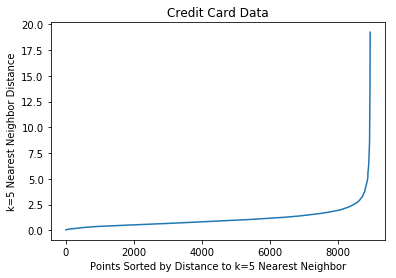

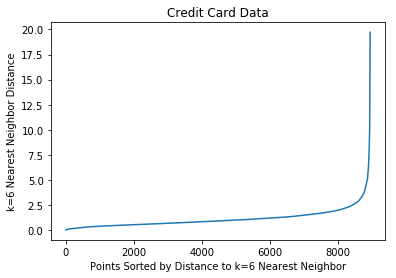

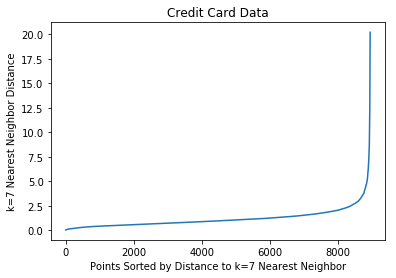

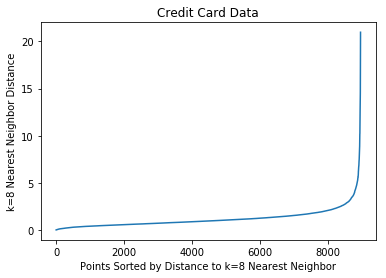

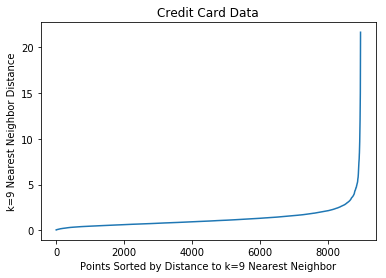

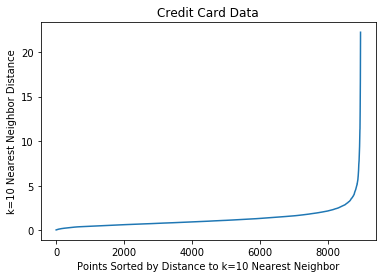

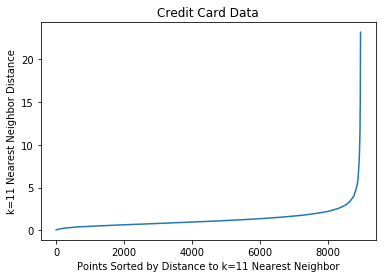

In [26]:
for k in range(2,12):
  nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
  distances, indices = nbrs.kneighbors(X)

  plt.plot(np.sort(distances.T[k-1]))
  plt.xlabel('Points Sorted by Distance to k=%s Nearest Neighbor'%k)
  plt.ylabel('k=%s Nearest Neighbor Distance'%k)
  plt.title('Credit Card Data')
  plt.show()

At k=5, we can see that the elbow plot dramatically shoots up at a value of 2.5. We can set out epsilon value to 2.5 since this is where the dramatic shift occurs and set our minumum number of samples to 5. 

In [27]:
dst = DBSCAN(eps=2.5, min_samples=5, metric='euclidean')
df['predicted_cluster_dbscan']=dst.fit_predict(X)

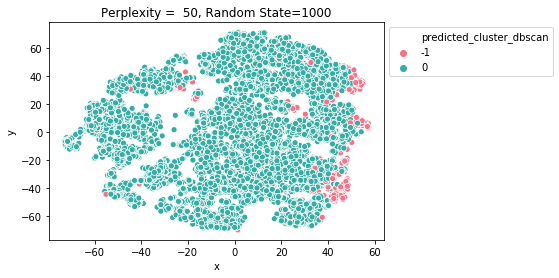

In [28]:
num_cls=len(df['predicted_cluster_dbscan'].unique())
dff = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x', y='y', hue='predicted_cluster_dbscan', legend = 'full', palette=sns.color_palette("husl", num_cls), data=dff)
plt.title('Perplexity =  50, Random State=1000')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

We create a TSNE plot for two clusters. We can once again color code by the class labels.

In [29]:
dff['predicted_cluster_dbscan'].value_counts()

 0    8608
-1     341
Name: predicted_cluster_dbscan, dtype: int64

We can view the number of customers in each cluster.

**Post Analysis (DBSCAN)**

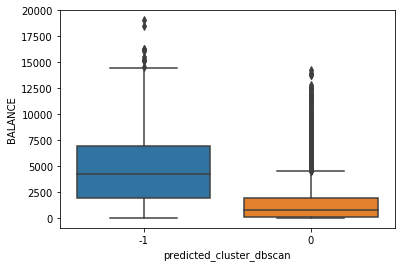

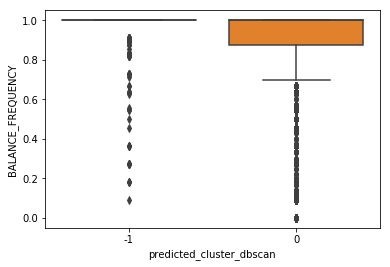

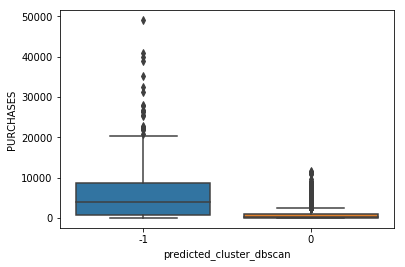

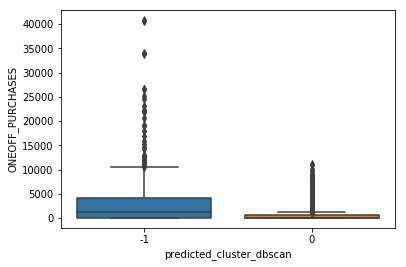

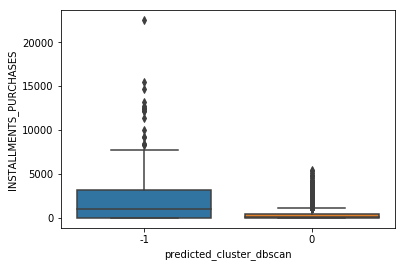

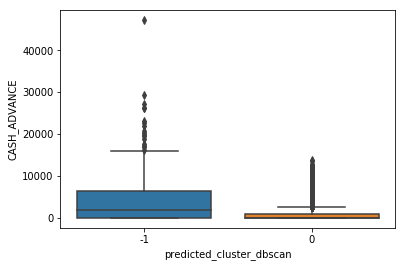

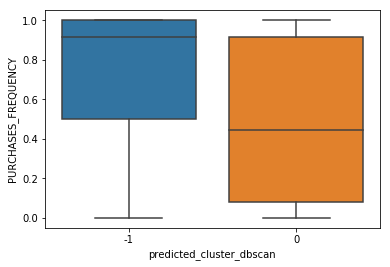

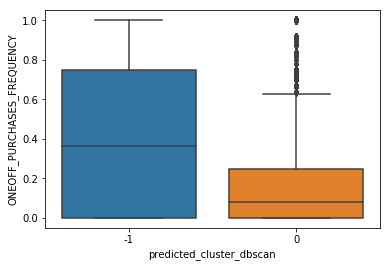

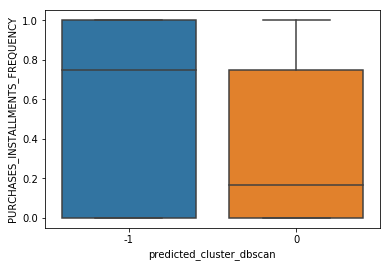

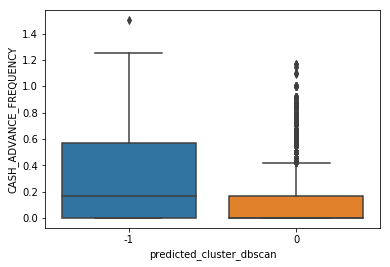

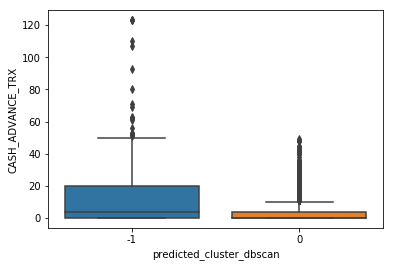

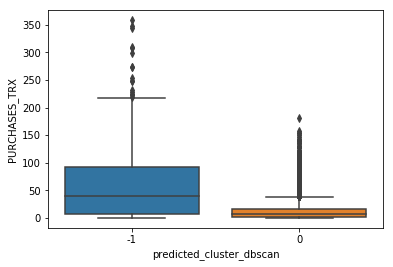

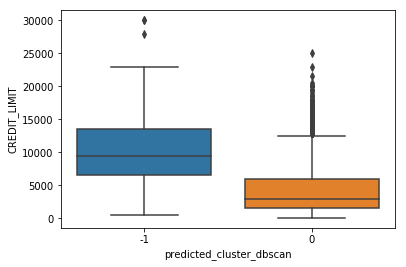

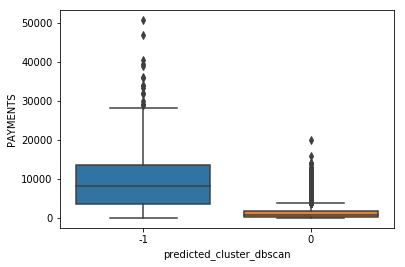

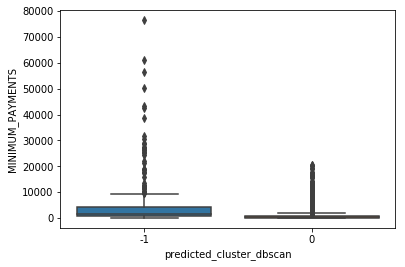

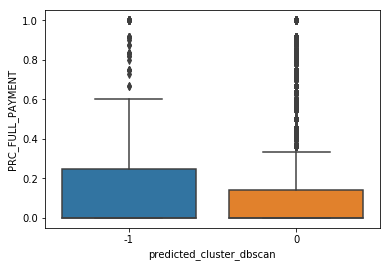

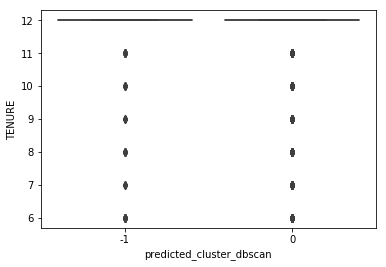

In [30]:
for col in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY',                   
'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',                              
'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']:
    sns.boxplot(x='predicted_cluster_dbscan', y=col, data=df)
    plt.show()

Create boxplots to view distribtion of values for an attribute in each cluster. From the boxplots, we can characterize each cluster and what kind of customer attributs fall into it. There are two clusters (-1,0). Cluster -1 is significantly smaller than cluster 0 and is characterized by customers with a high balance and credit limit who make many purchases frequently. They often pay cash in advance. These customers make large payments and often have a higher percent of payments made. This small subset of customers seems to be well off. Cluster 0 is very large is characterized by customers with low balances but high balance frequencies. These customers make small, but frequent purchases. They rarely pay cash in advance and have a low percent of payments made. Customers in this cluster also have a lower credit limit.  

In [31]:
df_sort=df.sort_values(by=['predicted_cluster_dbscan'])
df_sort=df_sort.drop(['CUST_ID','predicted_cluster_dbscan'], axis=1)

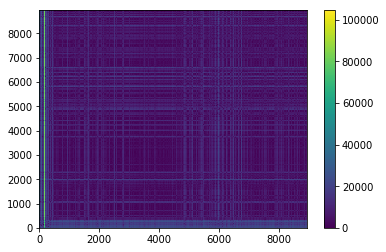

In [32]:
dist_mat = squareform(pdist(df_sort))
N = len(df_sort)
plt.pcolormesh(dist_mat)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Cluster -1 has lighter patches and a significant green line around element, suggesting that the clustering is not very cohesive. Cluster 0 has darker patches and is surrounded by ligher patches, suggesting there is better cohesion and separation.

In [33]:
silhouette_avg = silhouette_score(X, df['predicted_cluster_dbscan'])
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5676963766965155


The average silhouette score of 0.5677 is pretty decent but still slightly far from the ideal score of 1.

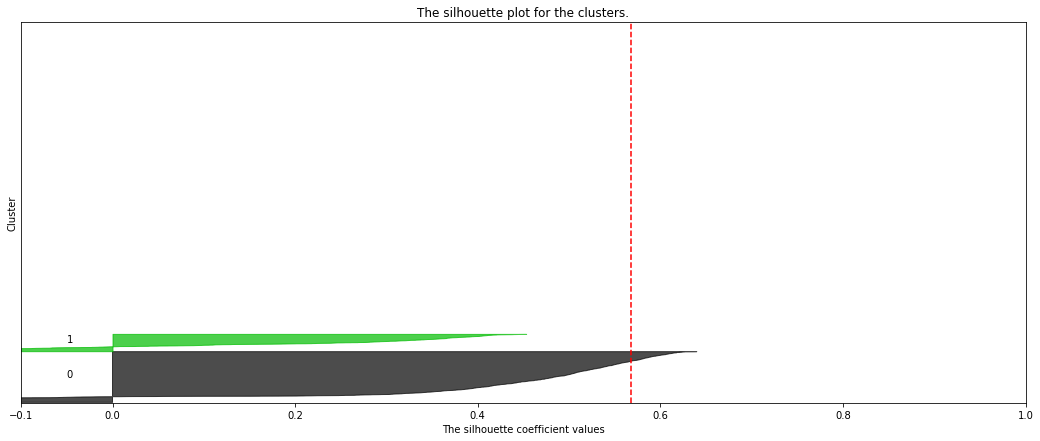

In [34]:
sample_silhouette_values = silhouette_samples(X, df['predicted_cluster_dbscan'])

clusters=len(df['predicted_cluster_dbscan'].unique())


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (clusters + 1) * 10])


y_lower = 10
for i in range(clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[df['cluster'] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10 

ax1.set_title("The silhouette plot for the clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

Cluster -1 has a low silhouette score and negative values, indicating that it has poor separation and cohesion. This is confirmed in the TSNE plot since there is no real clustering structure and the points in the cluster are isolated from each other and all over the place. Meanwhile, cluster 0 has a high silhouettte score, indicating it has separation and cohesion. We can see that this is true in the plot since there is a distinct clustering structure where points rarely overlap and all points in the cluster are relatively close to each other.

**Analysis Summary**

After conducting both the kmeans algorithm as well as the DBSCAN algorithm on the credit card data set, we gained valuable insights into clustering the data and its different patterns. I think the DBSCAN algorithm gave us better results because it gave us more separate and cohesive clusters. The Kmeans algorithm had a low silhouette score and many of the clusters had negative values and bad cohesion and separation. Still, the Kmeans algorithm gave us more clusters which could be useful for having more specific attribute groups. Overall, both algorithms were able to group bank customers into clusters and provide insights into their habits and attributes.This is useful for our research motivation because it shows the benefit of clustering customers to maximize revenue. For example, in the DBSCAN algorithm, we saw that customers in cluster -1 have a higher percent of payments made, so banks can give out more loans to these customers while giving out less loans to customers in cluster 0 who have a low percent of payments made. This and other attributes from the clusterings will help banks make informed decisions when giving out credit and help them maximize revenue.